In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
happy2019 = pd.read_csv('2019.csv')

In [3]:
happy2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
happy2019.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


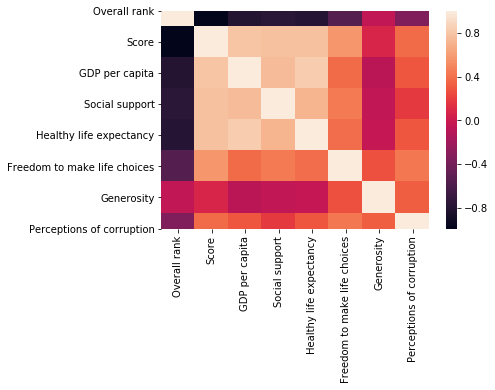

In [5]:
sns.heatmap(happy2019.corr())

In [6]:
happy2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [8]:
happy2019[['Overall rank', 'Score' , 'Country or region']].head(20)

,Overall rank,Score,Country or region
0,1,7.769,Finland
1,2,7.600,Denmark
2,3,7.554,Norway
3,4,7.494,Iceland
4,5,7.488,Netherlands
5,6,7.480,Switzerland
6,7,7.343,Sweden
7,8,7.307,New Zealand
8,9,7.278,Canada
9,10,7.246,Austria


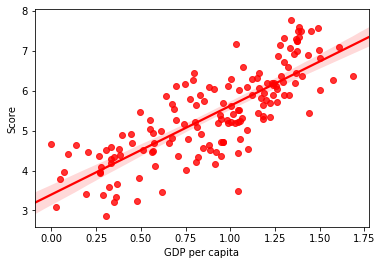

In [9]:
sns.regplot(x = 'GDP per capita', y='Score', data = happy2019 , color = 'red')

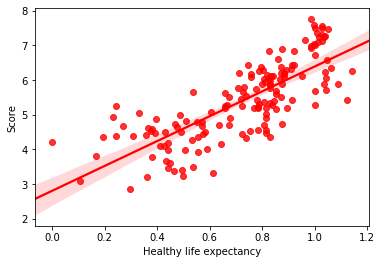

In [10]:
sns.regplot(x ='Healthy life expectancy' ,y='Score', data = happy2019 , color = 'red')

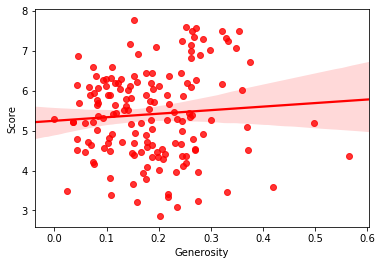

In [11]:
sns.regplot(x ='Generosity' ,y='Score', data = happy2019 , color = 'red')

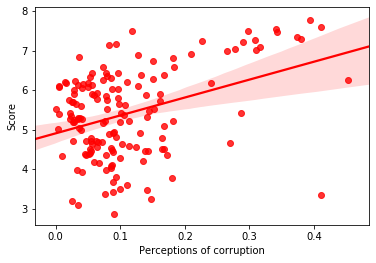

In [12]:
sns.regplot(x ='Perceptions of corruption' ,y='Score', data = happy2019 , color = 'red')

In [15]:
ginidf = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_887268.csv', skiprows=4)

In [16]:
ginidf.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
len(ginidf.index)

264

In [41]:
len(happy2019.index)

156

In [43]:
ginidf.set_index('Country Name',inplace=True)

KeyError: "None of ['Country Name'] are in the columns"

In [44]:
ginidf.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN
Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,NaN
Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#I want to transform my data so that I am only given the latest Gini coefficient as wella s the year that it was last updated.
#To do this I will create two new columns in the data frame. 
### One for each of the two above things that I stated I was lookiing for. 
# I honestly only want relatively recent data so if there is no Gini coefficient after 2009, then we'll just give them nans.
# I also have then (non) problem of having more gini index countries than ones with happiness data.
# Seeing as happiness is the thing that I care about the most I'm only going to pay attnetion to the countries in that data set.


#for column in ginidf[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]:
   # Select column contents by column name using [] operator
 #  if ginidf[column]columnSeriesObj = empDfObj[column]
  # print('Colunm Name : ', column)
   #print('Column Contents : ', columnSeriesObj.values)

In [45]:
type(ginidf['Country Code'])

pandas.core.series.Series